## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [123]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [124]:
import pandas as pd

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.fit_transform(x_test, y_test)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential()
# input layer
model.add(Dense(1, input_dim=13, activation='sigmoid'))
# hidden layet
model.add(Dense(1, activation="sigmoid"))
#output layer
model.add(Dense(1, activation="linear"))

model.compile(loss='mean_squared_error', optimizer="adam")

In [127]:
history = model.fit(x_train, y_train, epochs=500, verbose=0)

In [128]:
scores = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 2ms/sample - loss: 178.5899


In [129]:
print(history.history.keys())

dict_keys(['loss'])


In [130]:
print(history.history['loss'][0:10])

[568.0981203589109, 566.8388671875, 565.5639346283261, 564.2612631014078, 562.9604105430075, 561.6459864248144, 560.3060610931699, 558.9781312848081, 557.632936383238, 556.2946535620359]


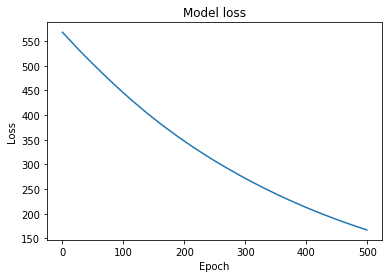

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mean_squared_error(y_test, y_pred)

40.6014544667151

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [134]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [135]:
X_train.shape

(60000, 28, 28)

In [136]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [138]:
# set to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [141]:
# set outputs to categorical
import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [142]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [143]:
mnist_model = Sequential()

# hidden layer
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
# output layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=150, verbose=1)

Epoch 1/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2820 - acc: 0.9189
Epoch 2/150
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2797 - acc: 0.9200
Epoch 3/150
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2832 - acc: 0.9186
Epoch 4/150
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2830 - acc: 0.9190
Epoch 5/150
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2841 - acc: 0.9187
Epoch 6/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2837 - acc: 0.9191
Epoch 7/150
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2811 - acc: 0.9204
Epoch 8/150
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2817 - acc: 0.9196
Epoch 9/150
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2837 - acc: 0.9198
Epoch 10/150
60000/60000 [==============================] - 3s 57us/sampl

In [147]:
score = mnist_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.5778 - acc: 0.8970


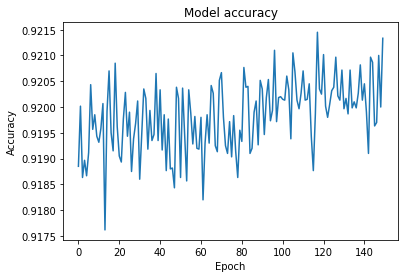

In [150]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Working on by hand model from yesterday's assignment

In [151]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [152]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [153]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        # 784x16 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 16x10 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

In [154]:
nn = NeuralNetwork()

print("Layer 1 weights: \n", nn.weights1)
print("Layer 2 weights: \n", nn.weights2)

Layer 1 weights: 
 [[ 0.74295742  1.35425249 -0.66096164 ... -0.38064626 -1.24225685
   1.09956934]
 [-1.35914001 -1.40447274  0.44109855 ...  0.01670077  1.88507483
   0.8397642 ]
 [-0.32250438  0.55706315 -0.82318112 ...  2.19978861 -0.38889093
   0.20263106]
 ...
 [-0.90890511  0.11015592 -3.08956061 ...  0.42676175  0.82640372
   1.40771947]
 [-0.42931636  1.1528452   0.02888413 ...  0.60833287  0.57351557
  -0.15724336]
 [ 1.42754249  0.13084623 -1.06059479 ... -1.13779337 -0.79211192
   0.30359371]]
Layer 2 weights: 
 [[ 1.58188961 -0.04600316 -0.89608967 -1.10721735  1.89100972 -0.5216377
  -0.02303224 -0.9559424   0.58288368  0.60753178]
 [-1.81263001  0.70024494  0.16099348  0.61084239  0.94679019 -1.42757899
   1.23202168 -0.59567051  1.32097272  0.41485716]
 [-0.34334402 -0.85882011 -2.04636574 -0.22957551  0.65335963 -0.25102628
  -0.03240604 -2.56623327  1.68551522 -0.90013139]
 [ 0.76067754 -1.51313504  0.12519015 -0.32513864  1.27440999  0.65196029
  -0.46586424 -0.85217

In [155]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        #7843x16 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 16x10 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [158]:
# generate an output

nn = NeuralNetwork()

print(X_train[0])
output = nn.feed_forward(X_train[0])
print("output", output)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [159]:
# calculate error

output_all = nn.feed_forward(X_train)
error_all = y_train - output_all
print(output_all)
print(error_all)

[[0.35356054 0.9531732  0.96920653 ... 0.09763906 0.13075054 0.04388401]
 [0.51837313 0.98547123 0.36164695 ... 0.10585943 0.16308648 0.001513  ]
 [0.89231858 0.97368006 0.61363123 ... 0.22342737 0.01109771 0.00278112]
 ...
 [0.81473056 0.67851118 0.50120537 ... 0.10307234 0.15627677 0.01031645]
 [0.3455534  0.99751133 0.35450978 ... 0.01631821 0.10826003 0.002515  ]
 [0.0891342  0.99287955 0.47843571 ... 0.01758363 0.21478979 0.01353846]]
[[-0.35356054 -0.9531732  -0.96920653 ... -0.09763906 -0.13075054
  -0.04388401]
 [ 0.48162687 -0.98547123 -0.36164695 ... -0.10585943 -0.16308648
  -0.001513  ]
 [-0.89231858 -0.97368006 -0.61363123 ... -0.22342737 -0.01109771
  -0.00278112]
 ...
 [-0.81473056 -0.67851118 -0.50120537 ... -0.10307234 -0.15627677
  -0.01031645]
 [-0.3455534  -0.99751133 -0.35450978 ... -0.01631821 -0.10826003
  -0.002515  ]
 [-0.0891342  -0.99287955 -0.47843571 ... -0.01758363  0.78521021
  -0.01353846]]


In [160]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 784
        self.hiddenNodes = 16
        self.outputNodes = 10
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def sigmoidPrime(self, x):
        return x * (1 - x)
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [162]:
nn = NeuralNetwork()

for i in range(1000):
    if ((i+1) % 100 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Predicted Output: \n', str(nn.feed_forward(X_train)))
        print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(X_train)))))
    nn.train(X_train, y_train)

+---------EPOCH 100---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 200---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 300---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 400---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Loss: 
 0.1
+---------EPOCH 500---------+
Predicted Output: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ..

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.